# Lección de Montecarlo

1.Tratando de determinar el número óptimo de autos comprar. El costo promedio anual de un auto es de $ 75.000. Además, está compañía ha recopilado las siguientes probabilidades de operación:

Número de autos alquilados por día	0	1	2	3	4
                    Probabilidad	0,10	0,10	0,25	0,30	0,25

Número de días de alquiler por auto	1	2	3	4
                    Probabilidad	0,40	0,35	0,15	0,10

Si el alquiler diario por auto es de 700, el costo de no tener un auto disponible cuando se solicita es de  400  y el costo de tener un auto ocioso durante un día es de 100, ¿cuál es la cantidad de autos que debería comprar la compañía?  Asuma que un auto que se alquila está disponible al día siguiente.
Simule el sistema para un año de 360 días (para la evaluación 15 días de funcionamiento) y muestre un análisis de costos de los 15 días simulados.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
autoXdia = [0,1,2,3,4]
probAxD = [0.1,0.1,0.25,0.3,0.25]
data1 = pd.DataFrame({'autoxdia': autoXdia, 'probabilidad': probAxD})
data1

,autoxdia,probabilidad
0,0,0.10
1,1,0.10
2,2,0.25
3,3,0.30
4,4,0.25


In [5]:
diaXauto = [1,2,3,4]
probDxA = [0.4,0.35,0.15,0.1]
data2 = pd.DataFrame({'diaxauto': diaXauto, 'probabilidad': probDxA})
data2

,diaxauto,probabilidad
0,1,0.40
1,2,0.35
2,3,0.15
3,4,0.10


In [6]:
aleatorios1 = [0.13,0.95,0.62,0.71,0.54,0.83,0.54,0.63,0.95,0.24,0.02,0.57,0.37,0.02,0.56]
aleatorios2 = [0.90,0.41,0.86,0.18,0.80,0.70,0.09,0.30,0.98,0.23,0.85,0.23,0.89,0.65,0.99]
a=data1['probabilidad']
a1= np.cumsum(a) #Cálculo la suma acumulativa de las probabilidades
data1['FPA'] =a1
data1

,autoxdia,probabilidad,FPA
0,0,0.10,0.10
1,1,0.10,0.20
2,2,0.25,0.45
3,3,0.30,0.75
4,4,0.25,1.00


In [7]:
a=data2['probabilidad']
a1= np.cumsum(a) #Cálculo la suma acumulativa de las probabilidades
data2['FPA'] =a1
data2

,diaxauto,probabilidad,FPA
0,1,0.40,0.40
1,2,0.35,0.75
2,3,0.15,0.90
3,4,0.10,1.00


In [23]:
data1['Min'] = data1['FPA']
data1['Max'] = data1['FPA']
lis = data1["Min"].values
lis2 = data1['Max'].values
lis[0]= 0
for i in range(1,len(data1)):
 lis[i] = lis2[i-1]
data1['Min'] = lis
data1

,autoxdia,probabilidad,FPA,Min,Max
0,0,0.10,0.10,0.00,0.10
1,1,0.10,0.20,0.10,0.20
2,2,0.25,0.45,0.20,0.45
3,3,0.30,0.75,0.45,0.75
4,4,0.25,1.00,0.75,1.00


In [24]:
data2['Min'] = data2['FPA']
data2['Max'] = data2['FPA']
lis = data2["Min"].values
lis2 = data2['Max'].values
lis[0]= 0
for i in range(1,len(data2)):
 lis[i] = lis2[i-1]
data2['Min'] = lis
data2

,diaxauto,probabilidad,FPA,Min,Max
0,1,0.40,0.40,0.00,0.40
1,2,0.35,0.75,0.40,0.75
2,3,0.15,0.90,0.75,0.90
3,4,0.10,1.00,0.90,1.00


In [25]:
dfMCL = pd.DataFrame({'ri-auto': aleatorios1})
max = data1['Max'].values
min = data1['Min'].values

In [26]:
def busqueda(arrmin, arrmax, valor):
    #print(valor)
    for i in range (len(arrmin)):
    # print(arrmin[i],arrmax[i])
        if valor >= arrmin[i] and valor <= arrmax[i]:
            return i
    return -1
xpos = dfMCL['ri-auto']
posi = [0] * len(dfMCL)
for j in range(len(dfMCL)):
    val = xpos[j]
    pos = busqueda(min,max,val)
    posi[j] = pos

In [27]:
import itertools
import math
simula = []
for j in range(len(dfMCL)):
    for i in range(len(dfMCL)):
        sim = data1.loc[data1['autoxdia'] == posi[i]+1]
        simu = sim.filter(['probabilidad']).values
        iterator = itertools.chain(*simu)
        for item in iterator:
            a=item
        simula.append(round(a,2))
dfMCL["Simulación"] = pd.DataFrame(simula)
dfMCL['autos'] = posi
dfMCL

,ri-auto,Simulación,autos
0,0.13,0.25,1
1,0.95,0.25,4
2,0.62,0.25,3
3,0.71,0.25,3
4,0.54,0.25,3
5,0.83,0.25,4
6,0.54,0.25,3
7,0.63,0.25,3
8,0.95,0.25,4
9,0.24,0.30,2


In [38]:
dfMCL['ri-dia'] = aleatorios2
max = data2['Max'].values
min = data2['Min'].values
xpos = dfMCL['ri-dia']
posi = [0] * len(dfMCL)
for j in range(len(dfMCL)):
    val = xpos[j]
    pos = busqueda(min,max,val)
    posi[j] = pos
simula = []
for j in range(len(dfMCL)):
    for i in range(len(dfMCL)):
        sim = data2.loc[data2['diaxauto'] == posi[i]+1]
        simu = sim.filter(['probabilidad']).values
        iterator = itertools.chain(*simu)
        for item in iterator:
            a=item
        simula.append(round(a,2))
dfMCL["Simulación"] = pd.DataFrame(simula)
for i in range(len(posi)):
    posi[i] = posi[i]+1
dfMCL['dias'] = posi
dfMCL

,ri-auto,Simulación,autos,ri-dia,dias
0,0.13,0.15,1,0.90,3
1,0.95,0.35,4,0.41,2
2,0.62,0.15,3,0.86,3
3,0.71,0.40,3,0.18,1
4,0.54,0.15,3,0.80,3
5,0.83,0.35,4,0.70,2
6,0.54,0.40,3,0.09,1
7,0.63,0.40,3,0.30,1
8,0.95,0.10,4,0.98,4
9,0.24,0.40,2,0.23,1


In [131]:
autos = 6
costoAuto = 75000
alquilerDiario = 700
noDisponible = 400
autoOcioso = 100
#dfMCL['inventario-inicial'] = 0
#dfMCL.loc[:0,'inventario-inicial'] = autos
#dfMCL['inventario-final'] = 0
# dfMCL.loc[:1,'inventario-final'] = autos
inicial = [0]*len(dfMCL)
inicial[0] = autos
final = []
alquiler = []
disponibilidad = []
devolver = []
ocioso = []
for index, row in dfMCL.iterrows():
    final.append(inicial[index]-row['autos'])
    devolver.append(row['dias']+index)
    if inicial[index] < row['autos']:
        disponibilidad.append(noDisponible)
        if inicial[index] > 0:
            alquiler.append(inicial[index]*alquilerDiario*row['dias'])
        else:
            alquiler.append(0)
    else:
        alquiler.append(alquilerDiario*row['autos']*row['dias'])
        disponibilidad.append(0)
    for i in range(len(inicial)):
        if i==devolver[index]:
            inicial[i] = row['autos'] + inicial[i]
        if i == index+1:
            inicial[i] = final[index] + inicial[i]
    #inicial[int(devolver[index])] = row['autos']
    ocioso.append(autoOcioso*final[index])
dfMCL["inventario-inicial"] = pd.DataFrame(inicial)
dfMCL["inventario-final"] = pd.DataFrame(final)
dfMCL["Alquiler"] = pd.DataFrame(alquiler)
dfMCL["Ocioso"] = pd.DataFrame(ocioso)
dfMCL["No Disponible"] = pd.DataFrame(disponibilidad)

precioAutos = autos * costoAuto
alquilerPromedio=dfMCL["Alquiler"].mean()
ociosoPromedio=dfMCL["Ocioso"].mean()
noDisponiblePromedio=dfMCL["No Disponible"].mean()
simulacion = pd.DataFrame({'6 autos': [precioAutos, alquilerPromedio, ociosoPromedio, noDisponiblePromedio],
                           'index': ['Precio Autos', ' Promedio alquiler', 'Promedio Ocioso', 'Promedio no disponible']})
simulacion.set_index('index', inplace=True)
dfMCL

,ri-auto,Simulación,autos,ri-dia,dias,inventario-inicial,inventario-final,Alquiler,Ocioso,No Disponible
0,0.13,0.15,1,0.90,3,6.0,5.0,2100.0,500.0,0
1,0.95,0.35,4,0.41,2,5.0,1.0,5600.0,100.0,0
2,0.62,0.15,3,0.86,3,1.0,-2.0,2100.0,-200.0,400
3,0.71,0.40,3,0.18,1,3.0,0.0,2100.0,0.0,0
4,0.54,0.15,3,0.80,3,3.0,0.0,6300.0,0.0,0
5,0.83,0.35,4,0.70,2,3.0,-1.0,4200.0,-100.0,400
6,0.54,0.40,3,0.09,1,-1.0,-4.0,0.0,-400.0,400
7,0.63,0.40,3,0.30,1,6.0,3.0,2100.0,300.0,0
8,0.95,0.10,4,0.98,4,6.0,2.0,11200.0,200.0,0
9,0.24,0.40,2,0.23,1,2.0,0.0,1400.0,0.0,0


In [110]:
autos = 7
costoAuto = 75000
alquilerDiario = 700
noDisponible = 400
autoOcioso = 100
#dfMCL['inventario-inicial'] = 0
#dfMCL.loc[:0,'inventario-inicial'] = autos
#dfMCL['inventario-final'] = 0
# dfMCL.loc[:1,'inventario-final'] = autos
inicial = [0]*len(dfMCL)
inicial[0] = autos
final = []
alquiler = []
disponibilidad = []
devolver = []
ocioso = []
for index, row in dfMCL.iterrows():
    final.append(inicial[index]-row['autos'])
    devolver.append(row['dias']+index)
    if inicial[index] < row['autos']:
        disponibilidad.append(noDisponible)
        if inicial[index] > 0:
            alquiler.append(inicial[index]*alquilerDiario*row['dias'])
        else:
            alquiler.append(0)
    else:
        alquiler.append(alquilerDiario*row['autos']*row['dias'])
        disponibilidad.append(0)
    for i in range(len(inicial)):
        if i==devolver[index]:
            inicial[i] = row['autos'] + inicial[i]
        if i == index+1:
            inicial[i] = final[index] + inicial[i]
    #inicial[int(devolver[index])] = row['autos']
    ocioso.append(autoOcioso*final[index])
dfMCL["inventario-inicial"] = pd.DataFrame(inicial)
dfMCL["inventario-final"] = pd.DataFrame(final)
dfMCL["Alquiler"] = pd.DataFrame(alquiler)
dfMCL["Ocioso"] = pd.DataFrame(ocioso)
dfMCL["No Disponible"] = pd.DataFrame(disponibilidad)

precioAutos = autos * costoAuto
alquilerPromedio = dfMCL["Alquiler"].mean()
ociosoPromedio = dfMCL["Ocioso"].mean()
noDisponiblePromedio = dfMCL["No Disponible"].mean()
simulacion['7 autos'] = [precioAutos, alquilerPromedio, ociosoPromedio, noDisponiblePromedio]
simulacion

,6 autos,7 autos
index,,
Precio Autos,450000.000000,525000.000000
Promedio alquiler,3406.666667,3686.666667
Promedio Ocioso,93.333333,193.333333
Promedio no disponible,106.666667,53.333333


In [114]:
autos = 8
costoAuto = 75000
alquilerDiario = 700
noDisponible = 400
autoOcioso = 100
#dfMCL['inventario-inicial'] = 0
#dfMCL.loc[:0,'inventario-inicial'] = autos
#dfMCL['inventario-final'] = 0
# dfMCL.loc[:1,'inventario-final'] = autos
inicial = [0]*len(dfMCL)
inicial[0] = autos
final = []
alquiler = []
disponibilidad = []
devolver = []
ocioso = []
for index, row in dfMCL.iterrows():
    final.append(inicial[index]-row['autos'])
    devolver.append(row['dias']+index)
    alquiler.append(alquilerDiario*row['autos']*row['dias'])
    if inicial[index] < row['autos']:
        disponibilidad.append(noDisponible)
        if inicial[index] > 0:
            alquiler.append(inicial[index]*alquilerDiario*row['dias'])
        else:
            alquiler.append(0)
    else:
        alquiler.append(alquilerDiario*row['autos']*row['dias'])
        disponibilidad.append(0)
    for i in range(len(inicial)):
        if i==devolver[index]:
            inicial[i] = row['autos'] + inicial[i]
        if i == index+1:
            inicial[i] = final[index] + inicial[i]
    #inicial[int(devolver[index])] = row['autos']
    ocioso.append(autoOcioso*final[index])
dfMCL["inventario-inicial"] = pd.DataFrame(inicial)
dfMCL["inventario-final"] = pd.DataFrame(final)
dfMCL["Alquiler"] = pd.DataFrame(alquiler)
dfMCL["Ocioso"] = pd.DataFrame(ocioso)
dfMCL["No Disponible"] = pd.DataFrame(disponibilidad)

precioAutos = autos * costoAuto
alquilerPromedio = dfMCL["Alquiler"].mean()
ociosoPromedio = dfMCL["Ocioso"].mean()
noDisponiblePromedio = dfMCL["No Disponible"].mean()
simulacion['8 autos'] = [precioAutos, alquilerPromedio, ociosoPromedio, noDisponiblePromedio]
simulacion

,6 autos,7 autos,8 autos,9 autos
index,,,,
Precio Autos,450000.000000,525000.000000,600000.000000,675000.000000
Promedio alquiler,3406.666667,3686.666667,4060.000000,4106.666667
Promedio Ocioso,93.333333,193.333333,293.333333,393.333333
Promedio no disponible,106.666667,53.333333,26.666667,26.666667


In [112]:
autos = 9
costoAuto = 75000
alquilerDiario = 700
noDisponible = 400
autoOcioso = 100
#dfMCL['inventario-inicial'] = 0
#dfMCL.loc[:0,'inventario-inicial'] = autos
#dfMCL['inventario-final'] = 0
# dfMCL.loc[:1,'inventario-final'] = autos
inicial = [0]*len(dfMCL)
inicial[0] = autos
final = []
alquiler = []
disponibilidad = []
devolver = []
ocioso = []
for index, row in dfMCL.iterrows():
    final.append(inicial[index]-row['autos'])
    devolver.append(row['dias']+index)
    alquiler.append(alquilerDiario*row['autos']*row['dias'])
    if inicial[index] < row['autos']:
        disponibilidad.append(noDisponible)
        if inicial[index] > 0:
            alquiler.append(inicial[index]*alquilerDiario*row['dias'])
        else:
            alquiler.append(0)
    else:
        alquiler.append(alquilerDiario*row['autos']*row['dias'])
        disponibilidad.append(0)
    for i in range(len(inicial)):
        if i==devolver[index]:
            inicial[i] = row['autos'] + inicial[i]
        if i == index+1:
            inicial[i] = final[index] + inicial[i]
    #inicial[int(devolver[index])] = row['autos']
    ocioso.append(autoOcioso*final[index])
dfMCL["inventario-inicial"] = pd.DataFrame(inicial)
dfMCL["inventario-final"] = pd.DataFrame(final)
dfMCL["Alquiler"] = pd.DataFrame(alquiler)
dfMCL["Ocioso"] = pd.DataFrame(ocioso)
dfMCL["No Disponible"] = pd.DataFrame(disponibilidad)

precioAutos = autos * costoAuto
alquilerPromedio = dfMCL["Alquiler"].mean()
ociosoPromedio = dfMCL["Ocioso"].mean()
noDisponiblePromedio = dfMCL["No Disponible"].mean()
simulacion['9 autos'] = [precioAutos, alquilerPromedio, ociosoPromedio, noDisponiblePromedio]
simulacion

,6 autos,7 autos,8 autos,9 autos
index,,,,
Precio Autos,450000.000000,525000.000000,600000.000000,675000.000000
Promedio alquiler,3406.666667,3686.666667,4060.000000,4106.666667
Promedio Ocioso,93.333333,193.333333,293.333333,393.333333
Promedio no disponible,106.666667,53.333333,26.666667,26.666667


In [115]:
autos = 10
costoAuto = 75000
alquilerDiario = 700
noDisponible = 400
autoOcioso = 100
#dfMCL['inventario-inicial'] = 0
#dfMCL.loc[:0,'inventario-inicial'] = autos
#dfMCL['inventario-final'] = 0
# dfMCL.loc[:1,'inventario-final'] = autos
inicial = [0]*len(dfMCL)
inicial[0] = autos
final = []
alquiler = []
disponibilidad = []
devolver = []
ocioso = []
for index, row in dfMCL.iterrows():
    final.append(inicial[index]-row['autos'])
    devolver.append(row['dias']+index)
    alquiler.append(alquilerDiario*row['autos']*row['dias'])
    if inicial[index] < row['autos']:
        disponibilidad.append(noDisponible)
        if inicial[index] > 0:
            alquiler.append(inicial[index]*alquilerDiario*row['dias'])
        else:
            alquiler.append(0)
    else:
        alquiler.append(alquilerDiario*row['autos']*row['dias'])
        disponibilidad.append(0)
    for i in range(len(inicial)):
        if i==devolver[index]:
            inicial[i] = row['autos'] + inicial[i]
        if i == index+1:
            inicial[i] = final[index] + inicial[i]
    #inicial[int(devolver[index])] = row['autos']
    ocioso.append(autoOcioso*final[index])
dfMCL["inventario-inicial"] = pd.DataFrame(inicial)
dfMCL["inventario-final"] = pd.DataFrame(final)
dfMCL["Alquiler"] = pd.DataFrame(alquiler)
dfMCL["Ocioso"] = pd.DataFrame(ocioso)
dfMCL["No Disponible"] = pd.DataFrame(disponibilidad)

precioAutos = autos * costoAuto
alquilerPromedio = dfMCL["Alquiler"].mean()
ociosoPromedio = dfMCL["Ocioso"].mean()
noDisponiblePromedio = dfMCL["No Disponible"].mean()
simulacion['10 autos'] = [precioAutos, alquilerPromedio, ociosoPromedio, noDisponiblePromedio]
simulacion

,6 autos,7 autos,8 autos,9 autos,10 autos
index,,,,,
Precio Autos,450000.000000,525000.000000,600000.000000,675000.000000,750000.000000
Promedio alquiler,3406.666667,3686.666667,4060.000000,4106.666667,4153.333333
Promedio Ocioso,93.333333,193.333333,293.333333,393.333333,493.333333
Promedio no disponible,106.666667,53.333333,26.666667,26.666667,0.000000


In [128]:
seis = simulacion['6 autos']
seis = seis[1] - seis[2] - seis[3]
siete = simulacion['7 autos']
siete = siete[1] - siete[2] - siete[3]
ocho = simulacion['8 autos']
ocho = ocho[1] - ocho[2] - ocho[3]
nueve = simulacion['9 autos']
nueve = nueve[1] - nueve[2] - nueve[3]
diez = simulacion['10 autos']
diez = diez[1] - diez[2] - diez[3]
dfGanancia = pd.DataFrame({'ganancia': [seis, siete, ocho, nueve, diez]})
dfGanancia['autos'] = [6,7,8,9,10]
dfGanancia

,ganancia,autos
0,3206.666667,6
1,3440.000000,7
2,3740.000000,8
3,3686.666667,9
4,3660.000000,10


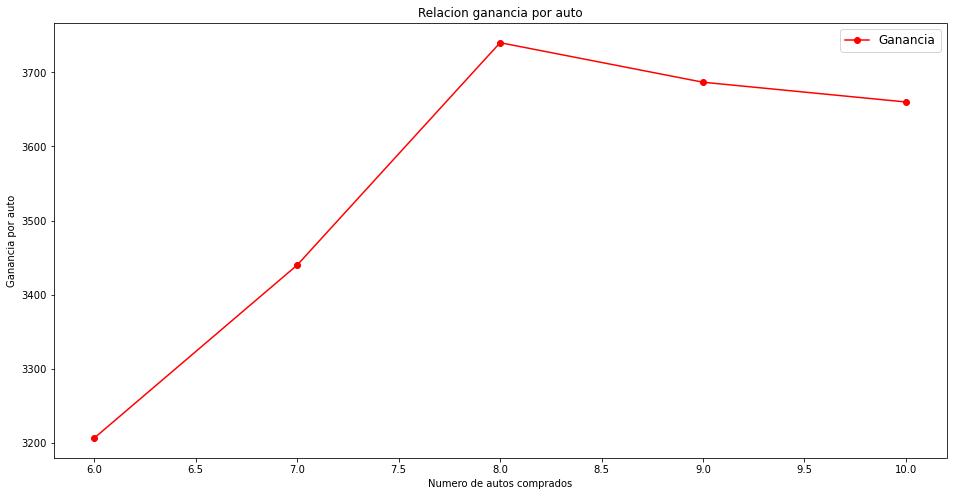

In [130]:
#Gráfica de la ganancia por auto
plt.figure(figsize=(16,8))
plt.title('Relacion ganancia por auto')
plt.plot(dfGanancia['autos'], dfGanancia['ganancia'], marker='o', color='red')
plt.xlabel('Numero de autos comprados')
plt.ylabel('Ganancia por auto') 
plt.legend(('Ganancia', ), prop = {'size':12},loc='upper right')
plt.show()

### Conclusiones 


En conclusion de puede decir que con el modelo Montecarlo podemos hacer un analisis cuantitativo para calcular los riesgos, ademas de las probabilidades multiples del tener riesgos con la simulación, con esta tecnica matematica podemos estimar posibles eventos incierto.


Ademas 